In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [38]:
df = pd.read_csv('WineQT.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [37]:
print(df.shape)

(1143, 13)


In [40]:
print(list(df.columns))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

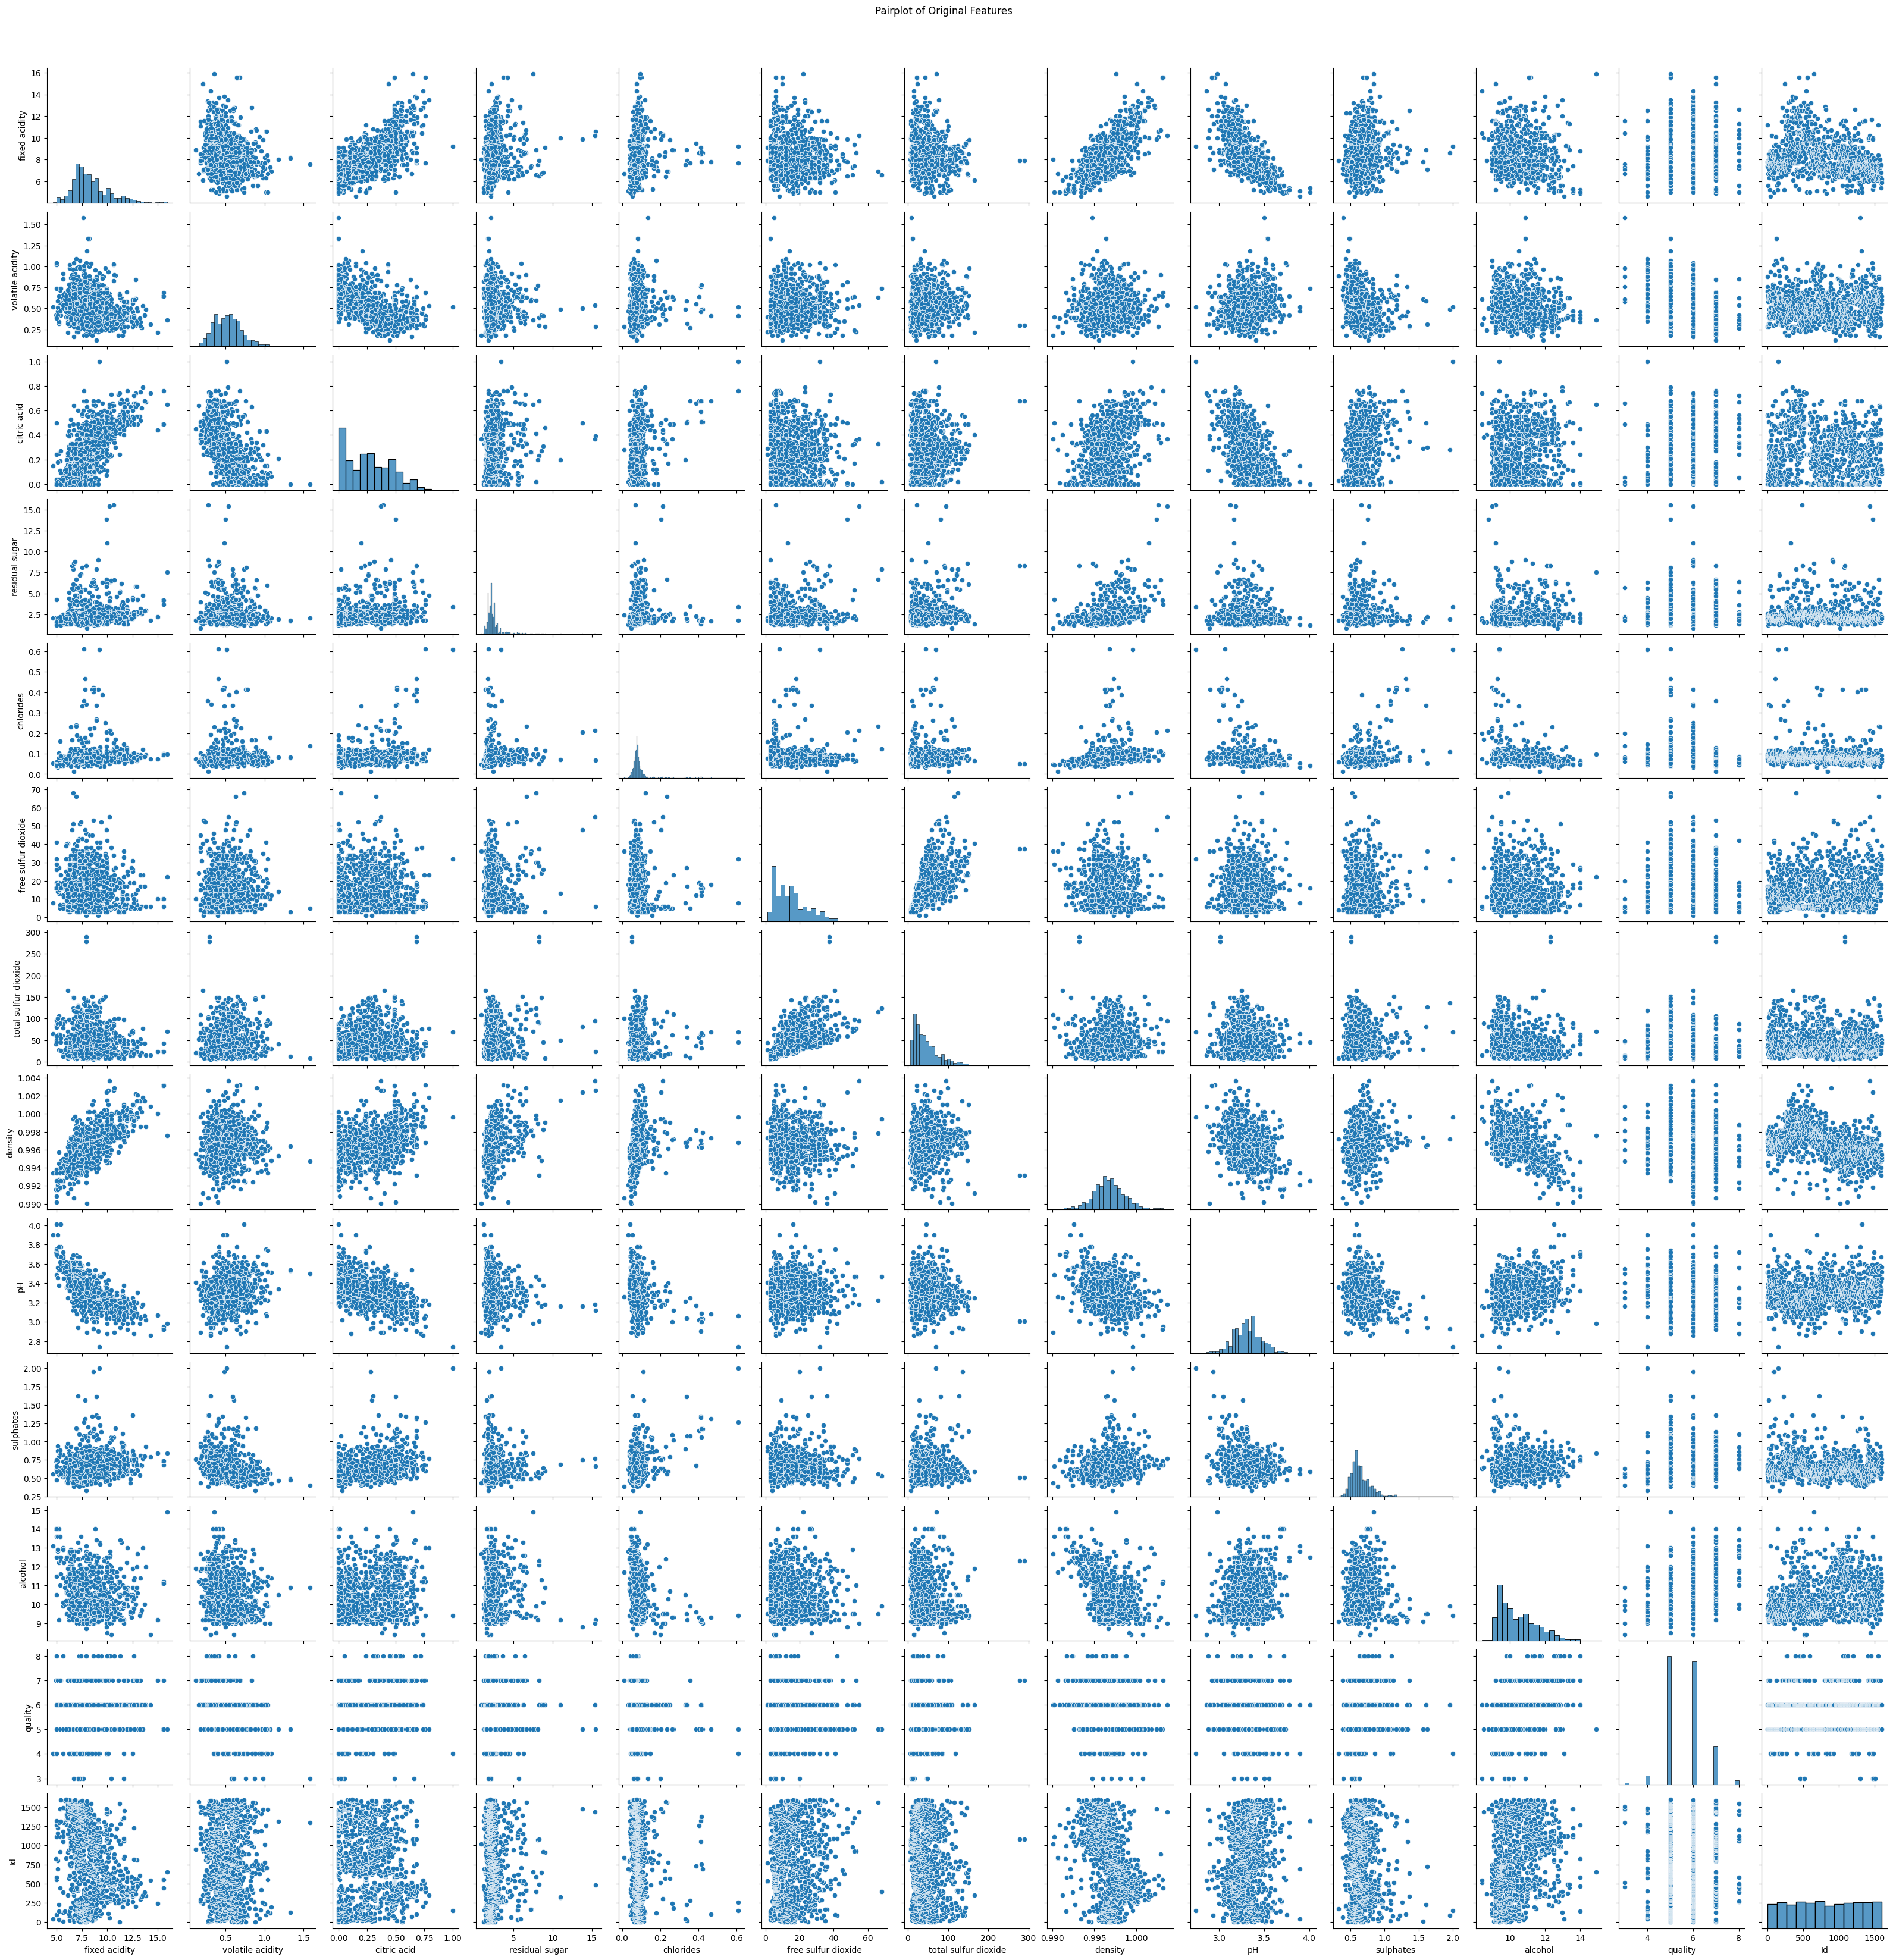

In [7]:
sns.pairplot(df)
plt.suptitle("Pairplot of Original Features", y=1.02)
plt.show()

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=list(df.columns))
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-0.815724,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-0.815724,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.425784,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.726993


In [33]:
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

pc_list = []
for i in range(len(list(df.columns))):
    pc_list.append("PC"+str(i+1))

pca_df = pd.DataFrame(pca_data,columns=pc_list)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.215133,1.794555,-1.537610,-0.052203,0.003922,1.786629,0.251273,0.057878,-0.080088,-0.315878,-0.195787,0.123697,0.014081
1,-0.467435,2.477990,0.070180,0.365108,0.093423,1.091779,-1.567659,-0.426642,-0.228097,0.581583,-0.887184,-0.162705,-0.179688
2,-0.401695,1.871949,-0.736971,0.290540,-0.043878,1.226444,-0.947468,-0.001386,-0.190190,0.555279,-0.482026,0.069791,-0.162349
3,2.645247,-0.100493,-0.050323,-0.821717,-1.813941,0.882346,-0.123624,0.550159,-0.286900,-0.486928,-0.050728,-0.009831,0.286738
4,-1.216916,1.792910,-1.536525,-0.051900,0.004963,1.779557,0.253433,0.055233,-0.079179,-0.316067,-0.194054,0.124441,0.014286


In [26]:
print(pca.explained_variance_ratio_)

[0.25192323 0.17625364 0.13093072 0.09354943 0.0744819  0.07123151
 0.04827287 0.04294517 0.0375559  0.03132014 0.0238955  0.01317823
 0.00446177]


In [28]:
print("\nExplained Variance (Eigen values):")
print(pca.explained_variance_)
print("\nPrincipal Axes (components/Eigen Vectors):")
print(pca.components_)
print("\nMean of each feature before transformation:")
print(pca.mean_)



Explained Variance (Eigen values):
[3.27786978 2.29330366 1.7035898  1.21720747 0.96911259 0.92682053
 0.62809684 0.55877605 0.4886542  0.40751834 0.31091351 0.17146701
 0.05805375]

Principal Axes (components/Eigen Vectors):
[[ 0.47750067 -0.22369614  0.44707047  0.16608228  0.21158396 -0.05584784
   0.01369381  0.39503221 -0.41520442  0.23669015 -0.1139593   0.07883684
  -0.20677085]
 [-0.03207913  0.38324503 -0.19392824  0.10924891  0.15183135  0.19774553
   0.31130712  0.29272457 -0.02396455 -0.16283452 -0.49875547 -0.49553927
  -0.19075973]
 [-0.14110177 -0.18501857  0.11730801  0.24849085  0.04397806  0.642225
   0.57703504 -0.13119569  0.02673612  0.2         0.16678464  0.14637357
   0.12579199]
 [-0.23229137  0.02661006 -0.02765048 -0.41600742  0.6435673  -0.04234129
  -0.04804604 -0.19681472 -0.01736526  0.53858969 -0.13774642 -0.06245743
   0.03513367]
 [-0.08593363  0.33018348 -0.11040697  0.69468691  0.31846579 -0.14602576
  -0.21690955  0.18187621  0.23215507  0.20806678

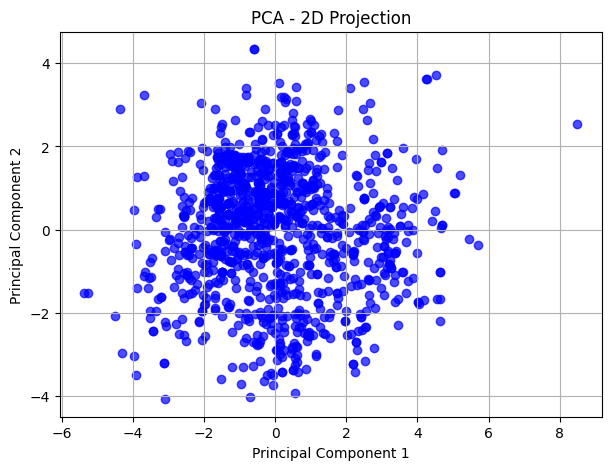

In [45]:
plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()

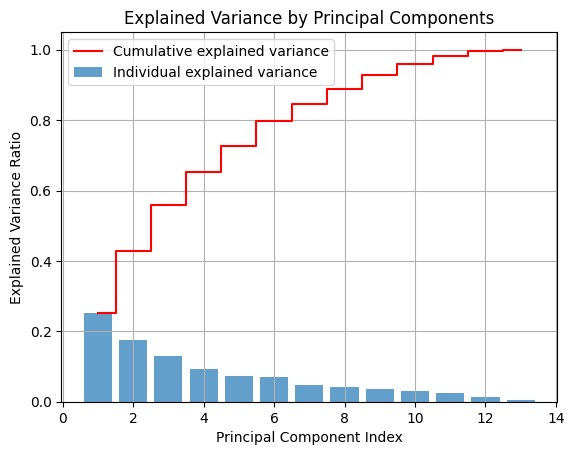

In [41]:
explained_var = pca.explained_variance_ratio_

plt.figure()
plt.bar(range(1,14), explained_var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1,14), np.cumsum(explained_var), where='mid', label='Cumulative explained variance', 
color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#To retain 95% of the total variance, 10 components must be considered.

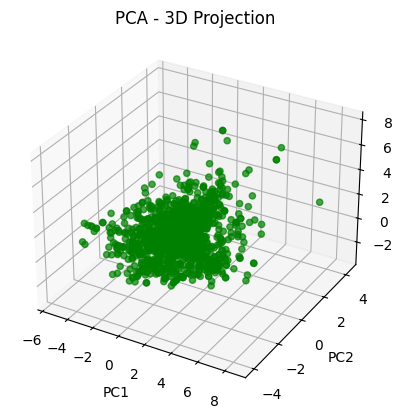

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='green', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3D Projection')
plt.show()
